In [9]:
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np 
import pandas as pd 
from keras.backend import clear_session
#from keras.utils import to_categorical
from keras.layers import Dense
from keras.models import Sequential
from keras.metrics import AUC
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve, classification_report
from tensorflow.random import set_seed
from tensorflow import get_logger
from sklearn.metrics import confusion_matrix

get_logger().setLevel('ERROR')

np.random.seed(1)
set_seed(1)

In [10]:
data = pd.read_csv('../../data_sets/fetal_health.csv')
data.sample(5)


print('Type of the data is:   ' ,type(data))
data_np=data.to_numpy()
print('Type of the data is:   ' ,type(data_np))
print('Shape of the data is:  ', data_np.shape)

Inputs=data_np[:,0:20]
Targets=data_np[:,21]
print(Targets[0:15])




Type of the data is:    <class 'pandas.core.frame.DataFrame'>
Type of the data is:    <class 'numpy.ndarray'>
Shape of the data is:   (2126, 22)
[2. 1. 1. 1. 1. 3. 3. 3. 3. 3. 2. 2. 1. 1. 1.]


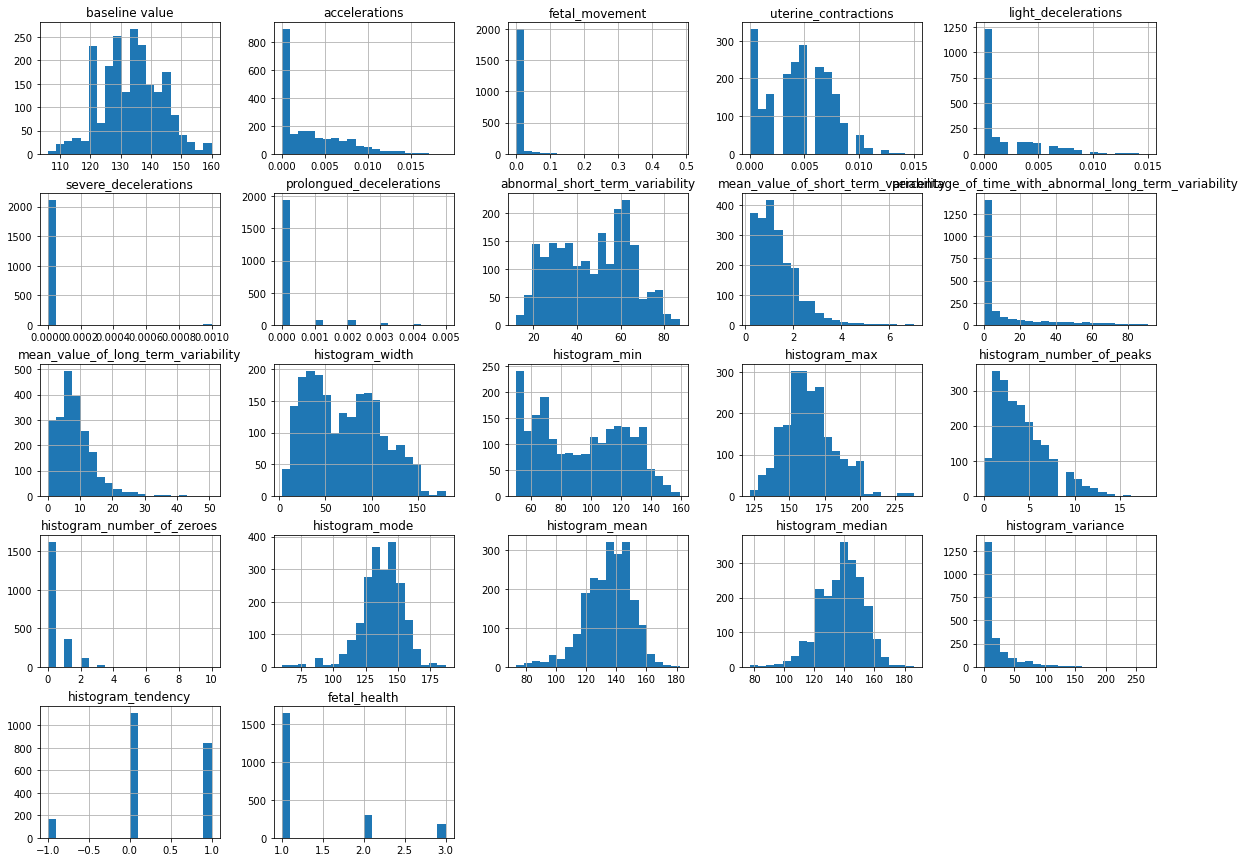

In [11]:
data.hist(bins=20, figsize=(20,15))
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline 
from sklearn.multiclass import OneVsRestClassifier 

from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.model_selection import train_test_split 




In [13]:

X_train, X_validation, y_train, y_validation = train_test_split(data.drop('fetal_health', axis=1), data['fetal_health'], test_size=0.20, random_state=33)

X_val, X_test, y_val, y_test = train_test_split(X_validation, y_validation, test_size=0.25, random_state=33)


model = MLPClassifier(solver='adam',hidden_layer_sizes=(15,), random_state=1,max_iter=2000)

model.fit(X_train, y_train)
ypred = model.predict(X_test)


In [14]:
print('Train Accuracy: ' , model.score(X_train, y_train))
print('Val Accuracy: ' , model.score(X_val, y_val))

Train Accuracy:  0.8541176470588235
Val Accuracy:  0.8589341692789969


In [15]:
#confusion matrix 
print("Confusion Matrix:")
print(confusion_matrix(y_test,model.predict(X_test)))
print()

print(classification_report(y_test,ypred))

Confusion Matrix:
[[82  0  1]
 [12  3  2]
 [ 1  0  6]]

              precision    recall  f1-score   support

         1.0       0.86      0.99      0.92        83
         2.0       1.00      0.18      0.30        17
         3.0       0.67      0.86      0.75         7

    accuracy                           0.85       107
   macro avg       0.84      0.67      0.66       107
weighted avg       0.87      0.85      0.81       107

